In [1]:
import os
# Set the working directory to your desired path
os.chdir(r'C:\Work\DS Study\G2\Data')

# Verify the change
print(os.getcwd())


C:\Work\DS Study\G2\Data


In [2]:
import pandas as pd
from datetime import datetime

In [3]:
df = pd.read_json("EQUITY_NSE_AXISBANK_ZERODHA.json", lines = True)
print(df.head())

   tradable  mode  instrument_token  last_price  last_traded_quantity  \
0      True  full           1510401     1170.05                     5   
1      True  full           1510401     1170.15                     1   
2      True  full           1510401     1170.05                     1   
3      True  full           1510401     1170.05                     1   
4      True  full           1510401     1170.00                     1   

   average_traded_price  volume_traded  total_buy_quantity  \
0               1163.58        1086986              319149   
1               1163.58        1086986              319149   
2               1163.58        1087097              319789   
3               1163.58        1087098              319835   
4               1163.58        1087098              319835   

   total_sell_quantity                                               ohlc  \
0               383084  {'open': 1158.0, 'high': 1170.7, 'low': 1154.6...   
1               383084  {'open': 1

In [4]:
columns_retain = ['exchange_timestamp', 'last_price']
df = df[columns_retain]
df['exchange_timestamp'] = pd.to_datetime(df['exchange_timestamp'])
df.set_index('exchange_timestamp', inplace=True)

In [5]:
df_resampled = df.resample('1min').mean() #.ohlc()

In [6]:
df_resampled

,last_price
exchange_timestamp,
2024-08-20 10:14:00,1170.061667
2024-08-20 10:15:00,1169.250556
2024-08-20 10:16:00,1169.086264
2024-08-20 10:17:00,1169.142529
2024-08-20 10:18:00,1169.278409
...,...
2024-08-20 15:25:00,1167.063415
2024-08-20 15:26:00,1166.345402
2024-08-20 15:27:00,1165.538710


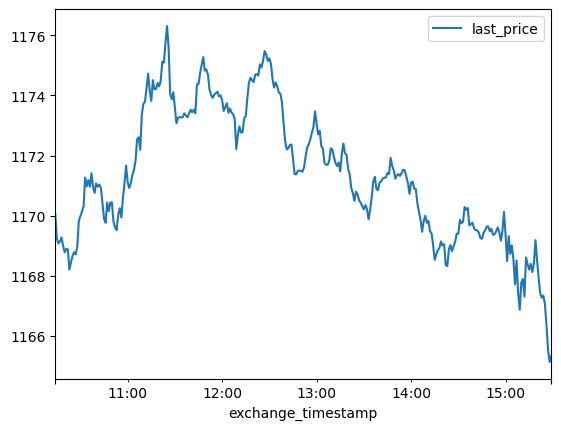

In [7]:
from matplotlib import pyplot
interpolated = df_resampled.interpolate(method='linear')
interpolated.plot()
pyplot.show()

In [14]:
 from statsmodels.tsa.seasonal import seasonal_decompose
 df_resampled = df_resampled.asfreq('min')
 df_resampled['last_price'] = df_resampled['last_price'].ffill()
 df_resampled
 decomposition = seasonal_decompose(df_resampled['last_price'], model='additive')

ValueError: freq MIN not understood. Please report if you think this is in error.